<a href="https://colab.research.google.com/github/mariacutillo/git-training/blob/main/Lezione_1_1_ML_ISS2025_introduzione_al_machine_learning_revMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to machine learning for health sciences
## Lesson 2 ***Pipeline supervised ***


In this notebook we will see:
-  Dataset creation. A liner separable dataset/ a non-linear separable dataset.
  - Gaussian "Balls"
  - Concentric circles
- Split train / validation / test
- Cross validation
- Supervised learning with two models:
  - logistic regression LR (a linear model)
  - k-NN (a non linear one)
- Performance evaluation
- A trick: feature engineering?


In this notebook we will compare LR and K-NN on two different simple problems.
We will also review a bit of python syntax.

# Step 1 - repeat the creation and visualization of dataset 1

 Coding advice: it is better to avoid the creation of temporary varibles in the notebook. It is also better to write "modular" code. Let's try to work with functions.

 - Variable defined inside a function (scope) will be deleted once the funcion ends.
 - Using function helps maitaining the code clean and readable


In [1]:
# Example of a function in python (and its quirks)


def function_without_args(): # when this function is called it returns a string

  return"I am the output of a function" # return interrupts execution of a function and returns the argument value of return

output_funzione = function_without_args()

print(output_funzione)

I am the output of a function


In [2]:
# a function can depend on variables passed as arguments

def function_with_args(valore):
  return "my argument is {}".format(valore)

output_funzione = function_with_args(2)

print(output_funzione)

my argument is 2


In [3]:
# Arbitrary code can be executed in a function and "return" is unnecessary if you don't want to pass variables
# in python functions access variables defined in the "notebook" but not vice versa.
#
defined_outside = "ML@UC"

def print_string():
  mystring= "this variable is defined in the function, the one below is not"
  print(mystring)
  print(defined_outside)

print_string()

this variable is defined in the function, the one below is not
ML@UC


In [4]:
# if we reassign a variable this doesn't change the external variable
def print_defined_inside():
  defined_outside = "I change its value inside the function"

  print("the variable changes only in the function : \n",defined_outside)

print_defined_inside()

# la variabile originale non è stata toccata

print("the original variable is still with us : \n", defined_outside)

the variable changes only in the function : 
 I change its value inside the function
the original variable is still with us : 
 ML@UC


In [ ]:
# beware that python is treacherous. If we change the content of a variable this will instead take effect in the notebook.
# all these strange things are the result of a concept that the passage as a "copy" or as a "reference".
#The matter is complicated and it is not important now but the message is that you have to be careful

In [5]:
my_list = ["cane","gatto","topo"]
print(my_list)
def funzione_su_lista(my_list):
  my_list[1]="cammello"


funzione_su_lista(my_list)# execute function, beware that I lose the original content in my_list
print(my_list)

# to avoid you can pass a variable as a copy explicitly
my_list = ["cane","gatto","topo"]
print(my_list)
funzione_su_lista(my_list.copy())# arg passed as a copy
print(my_list)

['cane', 'gatto', 'topo']
['cane', 'cammello', 'topo']
['cane', 'gatto', 'topo']
['cane', 'gatto', 'topo']


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# this function has default values!!!!!

Npoints= 1000
def get_dataset_ball(Npoints ,mu1=np.array([1,1]),  mu2  =np.array([-1,-1]),sigma=0.1):


  D = 2
  cov1 = sigma*np.array([[3, 1], [1, 2]])

  d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1
  d2 = sigma*np.random.randn(Npoints, D) + mu2

  # concatenate classes
  data= np.concatenate([d1,d2],axis=0)
  labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
  print(data.shape)
  print(labels.shape)
  return data, labels

X1, y1 = get_dataset_ball(Npoints)

(2000, 2)
(2000,)


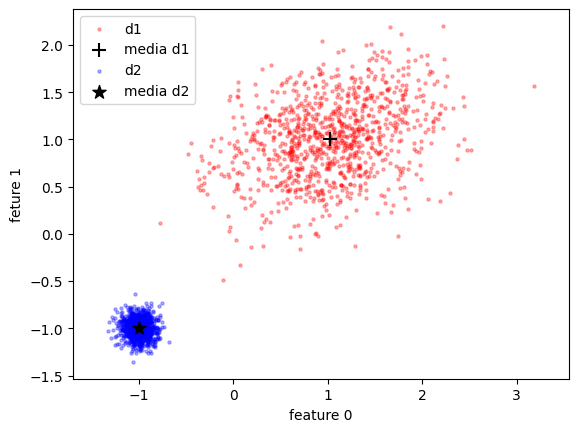

In [7]:
def plot_dataset(X,y):

  f,ax = plt.subplots(1)
  d1 = X[y==0,:]
  d2 = X[y==1,:]
  ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
  ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
  ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
  ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feture 1")
  ax.axis('equal')
  plt.legend()

plot_dataset(X1,y1)

In [8]:

def get_dataset_circle(Npoints, sigma=0.5):
  # Radius of the inner circle (class 0)
  radius_inner_circle = 2

  # Radius of the outer circle (class 1)
  radius_outer_circle = 5

  # Generate random angles for the circles
  theta_inner_circle = 2 * np.pi * np.random.rand(Npoints)
  theta_outer_circle = 2 * np.pi * np.random.rand(Npoints)

  # Generate points for class 0 (inner circle)
  x_inner_circle = radius_inner_circle * np.cos(theta_inner_circle)
  y_inner_circle = radius_inner_circle * np.sin(theta_inner_circle)

  # Generate points for class 1 (outer circle)
  x_outer_circle = radius_outer_circle * np.cos(theta_outer_circle)
  y_outer_circle = radius_outer_circle * np.sin(theta_outer_circle)

  # Create labels for the classes
  labels_inner_circle = np.zeros(Npoints)
  labels_outer_circle = np.ones(Npoints)

  # Concatenate the points and labels for the two classes
  X = np.concatenate((np.vstack((x_inner_circle, y_inner_circle)).T, np.vstack((x_outer_circle, y_outer_circle)).T))

  X = X + sigma*np.random.randn(*X.shape)# this is a tu
  y = np.concatenate((labels_inner_circle, labels_outer_circle))
  return X, y


X2,y2 = get_dataset_circle(Npoints, sigma=0.5)

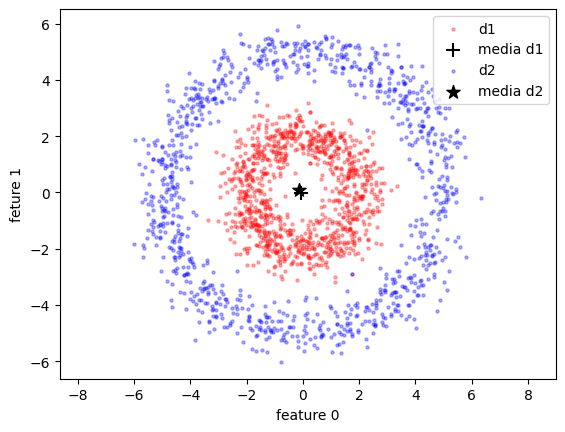

In [ ]:
plot_dataset(X2,y2)

# We now split the data.
## we will use a random selection
After remoring the test set we are going to perform the cross validation

In [9]:
# Splitting data
from sklearn.model_selection import train_test_split
#FILL-IN
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)



In [10]:
from sklearn.model_selection import KFold# look for it on the documentation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# this is the cross validation

kf = KFold(n_splits=4)
for i,(train, validation) in enumerate(kf.split(X1_train)): # train, test are the indices for each fold
  print(" test size for fold {}  : {}".format(i,len(validation)))

 test size for fold 0  : 335
 test size for fold 1  : 335
 test size for fold 2  : 335
 test size for fold 3  : 335


In [12]:
# we will wrap everything as a function so it is easier to analize the two datasets
def compare_accuracy(X1_train,y1_train):
  accuracyLR = []# create an array to store solutions
  accuracyKNN = []
  for i,(train, validation) in enumerate(kf.split(X1_train)):
    Xt = X1_train[train]
    Xv = X1_train[validation]
    yt = y1_train[train]
    yv = y1_train[validation]

    LR = LogisticRegression(random_state=0).fit(Xt, yt)
    KNN = KNeighborsClassifier(n_neighbors=5).fit(Xt, yt)

    predLR = LR.score(Xv,yv)
    predKNN = KNN.score(Xv,yv)

    accuracyLR.append(predLR)
    accuracyKNN.append(predKNN)

  print("LR : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyLR),np.std(accuracyLR)))
  print("KNN : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyKNN),np.std(accuracyKNN)))

  return accuracyLR, accuracyKNN



In [ ]:
accuracyLR, accuracyKNN  = compare_accuracy(X1_train,y1_train)

LR : mean accuracy is 1.000 +/- 0.000
KNN : mean accuracy is 1.000 +/- 0.000


In [ ]:
accuracyLR, accuracyKNN  = compare_accuracy(X2_train,y2_train)

LR : mean accuracy is 0.497 +/- 0.026
KNN : mean accuracy is 0.999 +/- 0.003


#Exercise! (here or at home, depending on what time it is)
- Why is the linear classifier good for DATASET1 and not good for DATASET2?
- use notebook code 1 to graph the decision surface in the case of DATASET 2

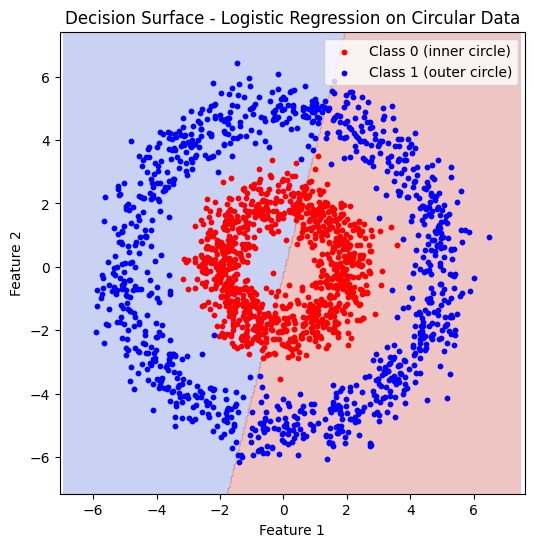

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you already ran get_dataset_circle and have X2, y2
# X2, y2 = get_dataset_circle(Npoints, sigma=0.5)

# Train a linear classifier
LR = LogisticRegression().fit(X2, y2)

# Create a grid of points covering the data space
xx, yy = np.meshgrid(
    np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 300),
    np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 300)
)

# Predict over the grid
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision surface
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X2[y2==0,0], X2[y2==0,1], color='red', s=10, label='Class 0 (inner circle)')
plt.scatter(X2[y2==1,0], X2[y2==1,1], color='blue', s=10, label='Class 1 (outer circle)')
plt.title("Decision Surface - Logistic Regression on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis('equal')
plt.show()


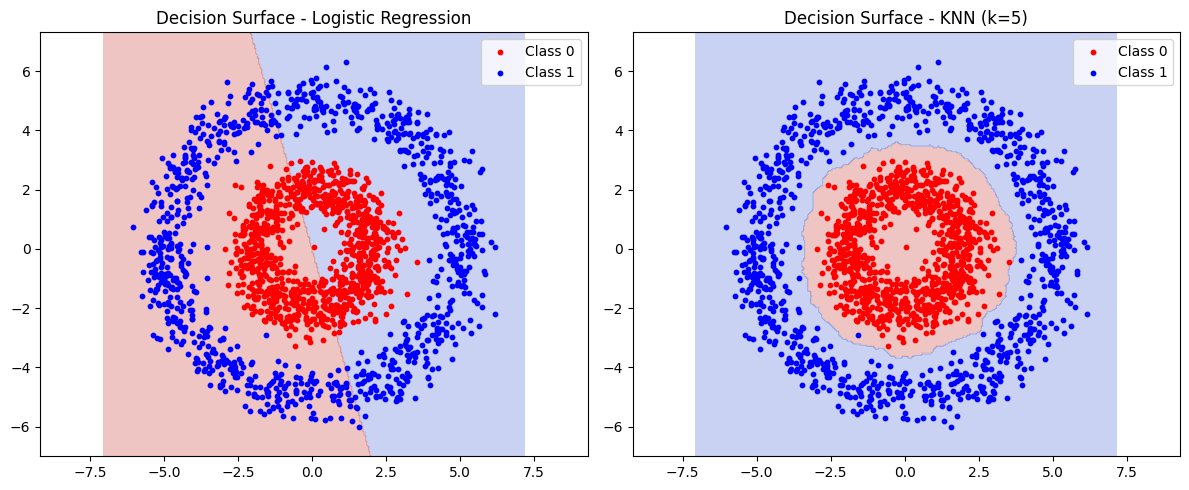

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# === Generate Dataset 2 ===
Npoints = 1000
def get_dataset_circle(Npoints, sigma=0.5):
    radius_inner_circle = 2
    radius_outer_circle = 5
    theta_inner = 2 * np.pi * np.random.rand(Npoints)
    theta_outer = 2 * np.pi * np.random.rand(Npoints)
    x_inner = radius_inner_circle * np.cos(theta_inner)
    y_inner = radius_inner_circle * np.sin(theta_inner)
    x_outer = radius_outer_circle * np.cos(theta_outer)
    y_outer = radius_outer_circle * np.sin(theta_outer)
    labels_inner = np.zeros(Npoints)
    labels_outer = np.ones(Npoints)
    X = np.concatenate((np.vstack((x_inner, y_inner)).T, np.vstack((x_outer, y_outer)).T))
    X = X + sigma * np.random.randn(*X.shape)
    y = np.concatenate((labels_inner, labels_outer))
    return X, y

X2, y2 = get_dataset_circle(Npoints, sigma=0.5)

# === Train models ===
LR = LogisticRegression().fit(X2, y2)
KNN = KNeighborsClassifier(n_neighbors=5).fit(X2, y2)

# === Create grid for decision surfaces ===
xx, yy = np.meshgrid(
    np.linspace(X2[:, 0].min()-1, X2[:, 0].max()+1, 300),
    np.linspace(X2[:, 1].min()-1, X2[:, 1].max()+1, 300)
)

# === Predictions ===
Z_LR = LR.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_KNN = KNN.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# === Plot side-by-side ===
plt.figure(figsize=(12,5))

# Logistic Regression
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_LR, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X2[y2==0,0], X2[y2==0,1], color='red', s=10, label='Class 0')
plt.scatter(X2[y2==1,0], X2[y2==1,1], color='blue', s=10, label='Class 1')
plt.title("Decision Surface - Logistic Regression")
plt.axis('equal')
plt.legend()

# KNN
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_KNN, cmap=plt.cm.coolwarm_r, alpha=0.3)  #_r per invertire l'ordine di colori
plt.scatter(X2[y2==0,0], X2[y2==0,1], color='red', s=10, label='Class 0')
plt.scatter(X2[y2==1,0], X2[y2==1,1], color='blue', s=10, label='Class 1')
plt.title("Decision Surface - KNN (k=5)")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


# How can we solve the problem for LR?
often a simple feature transformation solves the problem. Applying nonlinear operations in feature space allows nonlinear classifiers to exploit relationships to which they do not naturally have access.

Find a transformation of the data (feature engineering) that solves the problem

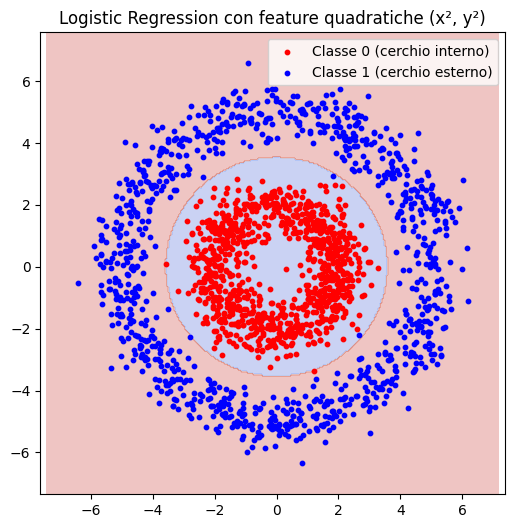

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# === Dataset cerchi ===
def get_dataset_circle(Npoints=1000, sigma=0.5):
    r_in, r_out = 2, 5
    theta_in = 2 * np.pi * np.random.rand(Npoints)
    theta_out = 2 * np.pi * np.random.rand(Npoints)
    X_in = np.c_[r_in * np.cos(theta_in), r_in * np.sin(theta_in)]
    X_out = np.c_[r_out * np.cos(theta_out), r_out * np.sin(theta_out)]
    X = np.vstack((X_in, X_out))
    X += sigma * np.random.randn(*X.shape)
    y = np.hstack((np.zeros(Npoints), np.ones(Npoints)))
    return X, y

# Dati
X, y = get_dataset_circle(1000, sigma=0.5)

# === Trasformazione non lineare: aggiungo x^2 e y^2 ===
X2 = np.column_stack((X[:,0]**2, X[:,1]**2))

# === Addestro la regressione logistica sulle feature quadratiche ===
model = LogisticRegression().fit(X2, y)

# === Griglia per visualizzare la superficie di decisione ===
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

# Trasformazione sulla griglia
grid = np.c_[xx.ravel(), yy.ravel()]
grid2 = np.column_stack((grid[:,0]**2, grid[:,1]**2))

# Predizioni
Z = model.predict(grid2).reshape(xx.shape)

# === Plot ===
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y==0,0], X[y==0,1], color='red', s=10, label='Classe 0 (cerchio interno)')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', s=10, label='Classe 1 (cerchio esterno)')
plt.legend()
plt.axis('equal')
plt.title("Logistic Regression con feature quadratiche (x², y²)")
plt.show()


LR : mean accuracy is 0.995 +/- 0.004
KNN : mean accuracy is 0.996 +/- 0.003


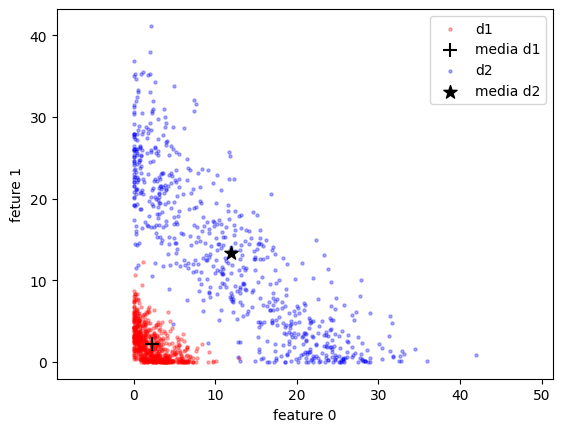

In [25]:
plot_dataset(X2_train**2,y2_train**2)#
accuracyLR, accuracyKNN  = compare_accuracy(X2_train**2,y2_train**2)